In [2]:
#Dependencies: 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt
import time 
import calendar
from numpy import array

In [3]:
#Import Data: 
df=pd.read_csv('./Data/Opioid_Related_Deaths_2012-2018.csv')
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,...,InjuryCounty,InjuryState,COD,Heroin,Synthetic Opioids,Prescription Opioids,DeathCityGeo,DeathCityLat,DeathCityLong,Drug_Category
0,14-0273,06/28/2014 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",False,True,True,"41.575155, -72.738288",41.575155,-72.738288,Synthetic Opioids
1,16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,...,NaN,NaN,Acute Heroin and Cocaine Intoxication,True,False,False,"41.393666, -73.451539",41.393666,-73.451539,Heroin
2,16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,...,NaN,NaN,Acute Fentanyl and Morphine Intoxication,True,True,False,"41.026526, -73.628549",41.026526,-73.628549,Heroin
3,13-0052,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,...,NaN,NaN,Fentanyl Intoxication,False,True,False,"41.026526, -73.628549",41.026526,-73.628549,Synthetic Opioids
4,14-0277,06/29/2014 12:00:00 AM,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,HARTFORD,...,NaN,NaN,Heroin Intoxication,True,False,False,"41.673037, -72.945791",41.673037,-72.945791,Heroin


In [6]:
df.index = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [7]:
# extract time series
time_series_data = df.groupby(pd.Grouper(freq='M')).count()["ID"]

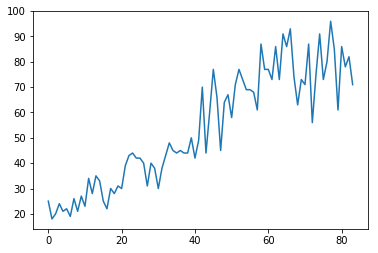

In [8]:
# plot
plt.plot(time_series_data.values)
plt.show()

In [9]:
#--ARIMA TIME!!-------

from statsmodels.tsa.arima_model import ARIMA

X_train = list(time_series_data.values)
predictions = []

In [10]:
# forecast the next 50 data points
for _ in range(50):
    model = ARIMA(X_train, order=(5,1,0))
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    y_hat = output[0] # new forecasted data point
    predictions.append(y_hat)
    X_train.append(y_hat) 
    # ^^add forecasted data point back to X_train to train model in the next round

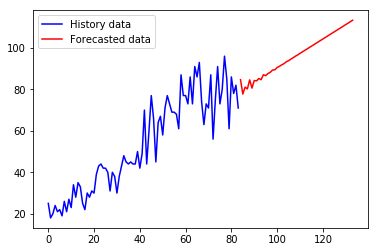

In [11]:
# plot
plt.plot(range(len(time_series_data.values)), time_series_data.values, color='blue', label='History data')
plt.plot(range(len(time_series_data.values), len(time_series_data.values) + len(predictions)), predictions, color='red', label='Forecasted data')
plt.legend()
plt.show()

In [14]:
#-----LSTM------
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

look_back = 40 # look back 40 data points (months) to make prediction

Using TensorFlow backend.


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
data = np.reshape(time_series_data.values, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
X, y = create_dataset(data, look_back)
# reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

C:\Users\mmsqu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# create model and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 0s - loss: 0.0921
Epoch 2/50
 - 0s - loss: 0.0276
Epoch 3/50
 - 0s - loss: 0.0243
Epoch 4/50
 - 0s - loss: 0.0196
Epoch 5/50
 - 0s - loss: 0.0172
Epoch 6/50
 - 0s - loss: 0.0200
Epoch 7/50
 - 0s - loss: 0.0176
Epoch 8/50
 - 0s - loss: 0.0176
Epoch 9/50
 - 0s - loss: 0.0161
Epoch 10/50
 - 0s - loss: 0.0168
Epoch 11/50
 - 0s - loss: 0.0160
Epoch 12/50
 - 0s - loss: 0.0158
Epoch 13/50
 - 0s - loss: 0.0146
Epoch 14/50
 - 0s - loss: 0.0151
Epoch 15/50
 - 0s - loss: 0.0140
Epoch 16/50
 - 0s - loss: 0.0145
Epoch 17/50
 - 0s - loss: 0.0136
Epoch 18/50
 - 0s - loss: 0.0137
Epoch 19/50
 - 0s - loss: 0.0144
Epoch 20/50
 - 0s - loss: 0.0137
Epoch 21/50
 - 0s - loss: 0.0131
Epoch 22/50
 - 0s - loss: 0.0123
Epoch 23/50
 - 0s - loss: 0.0142
Epoch 24/50
 - 0s - loss: 0.0150
Epoch 25/50
 - 0s - loss: 0.0140
Epoch 26/50
 - 0s - loss: 0.0124
Epoch 27/50
 - 0s - loss: 0.0108
Epoch 28/50
 - 0s - loss: 0.0102
Epoch 29/50
 - 0s - loss: 0.0121
Epoch 30/50
 - 0s - loss: 0.0117
Epoch 31/50
 - 0s -

In [18]:
# make prediction
val = data[-look_back:] # last batch in the training data
predictions = []

In [19]:
# forecast the next 50 data points
for _ in range(50):
    pred = model.predict(val.reshape(1,1,look_back))
    predictions = np.append(predictions,pred)
    val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
predictions = predictions.reshape(predictions.shape[0],1)

In [20]:
# reverse forecasted results to its original scale
predictions = scaler.inverse_transform(predictions)

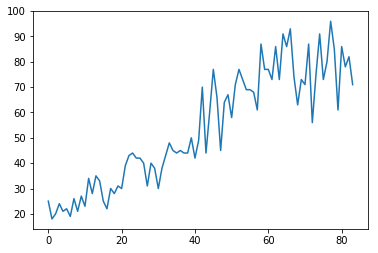

In [21]:
# plot
data_len = len(data)
plt.plot(list(range(data_len)),time_series_data.values,label="actual data")

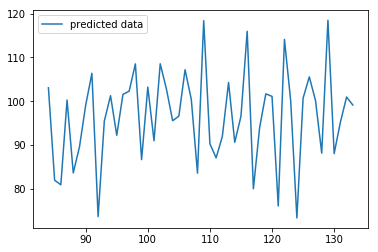

In [22]:
plt.plot(list(range(data_len,data_len+len(predictions))),predictions,label="predicted data")
plt.legend()
plt.show()